In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Esercizio 5.1


In questo esercizio vogliamo campionare il modulo quadro della funzione d'onda per l'atomo di idrogeno, per i livelli 1s e 2p. La funzione d'onda in MQ descrive lo stato di un sistema e il suo modulo quadro può essere interpretato come la probabilità di avere il sistema in un dato stato. Nel caso dell'atomo di idrogeno essa può essere ricavata risolvendo analticamente il problema e vi si ritrova la dipendenza da quattro numeri quantici; è comodo inoltre esprimere il problema, e di conseguenza la funzione d'onda, in coordinate sferiche.

Per campionare il modulo quadro della funzione d'onda ci avvaliamo dell'algoritmo di Metropolis, i.e. un metodo Monte Carlo capace di generare qualsiasi distribuzione di probabilità in qualsiasi dimensione e pertanto dalle vaste utilità computazionali. L'algoritmo procede per step secondo queste modalità: scelta una probabilità di transizione $t(x)$ per estrarre l'n+1-esimo step dell'algoritmo, valuta poi una probabilità di prova, definita come:
$$A(x_ {n+1}|x_n)=min(1,p(x_ {n+1})/p(x_n))$$
dove la distribuzione di probabilità $p(x)$ è quella da campionare.

Il punto verrà accettato secondo questa probabilità.

Nel nostro caso appunto le $p(x)$ sono le distribuzioni di probabilità dell'idrogeno, $t(x)$ verrà invece fatta variare durante l'esercizio tra una probabilità uniforme e una gaussiana.

La funzione di probabilità in coordinate sferiche del ground state (n=1, l=0, m=0) sarà:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} $$
mentre quella dello stato eccitato 2p(n=2, l=1, m=0) :
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
dove ricordiamo che $n$ è detto numero quantico principale, $l$ numero quantico azimutale e $m$ numero quantico magnetico. $a_0$ è la quantità che invece viene comunemente chiamata raggio di Bohr.
Ci aspettiamo che il valore medio per il raggio dell'elettrone nei due casi sia:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 
$$
poichè lavoriamo in unità di misura in cui il raggio di Bohr è posto uguale ad uno.
Procediamo come segue:
- campioniamo il modulo quadro della distribuzione di probabilità per il ground state ed utilizziamo l'algoritmo di Metropolis. In particolare scegliamo una probabilità uniforme per esso.
- con il metodo del data blocking valutiamo l'andamento del valor medio del raggio in funzione del numero di blocchi
- rieseguiamo lo stesso procedimento per il primo stato eccitato
- Cambiamo la distribuzione di probabilità con una gaussiana e paragoniamo i risultati ottenuti.

$\textbf{oss}$: Il codice salva automaticamente nei giusti file i dati relativi alle varie scelte possibili. Il comportamento dell'algoritmo è guidato da un file di input, sul modello di quello usato nell'esercizio 4.

### Equilibrazione del sistema

Seguiamo la regola empirica del 50%, ovverosia imponiamo la grandezza degli step dell'algoritmo tale che il rapporto tra il numero di punti accettati e il numero di punti estratti sia uguale a 1/2. Il motivo di questa scelta è presto detto: se la probabilità $t(x)$ è tale da permettere "larghi step ( nel senso di lontani dallo step precedente) è molto facile che l'algoritmo si allontani da una zona in cui la probabilità ha un massimo e che pertanto molte mosse vengano scartate; così facendo converge molto più lentamente, ovvero avrà una bassa efficienza. Al contrario, riducendo molto la larghezza degli step si potrebbe incorrere nel problema opposto: quasi tutte le mosse verranno accettate e si avrà un'alta correlazione; pertanto si sceglie un valore intermedio che cerchi di minimizzare entrambi i problemi.

Sono stati i seguenti valori per lo step dell'algoritmo, al fine di ottenere, come spiegato, un'accettanza del 50%:
 -  uniforme e 1s: $\delta$= 1.2
 -  uniforme e 2p: $\delta$=3
 - gaussiana e 1s: $\delta$=4
 - gaussiana e 2p: $\delta$=0.8 

Come si potrà vedere poi dai grafici l'algoritmo converge al valore atteso in un numero ragionevole di step, inoltre le incertezze sui dati non sono eccessivamente piccole, come potrebbe succedere tra dati fortemente correlati.


In [2]:
r=np.loadtxt("hidrogen100uniform.dat")
r_err=np.loadtxt("hidrogen100uniform_err.dat")
x=range(0,r.size)


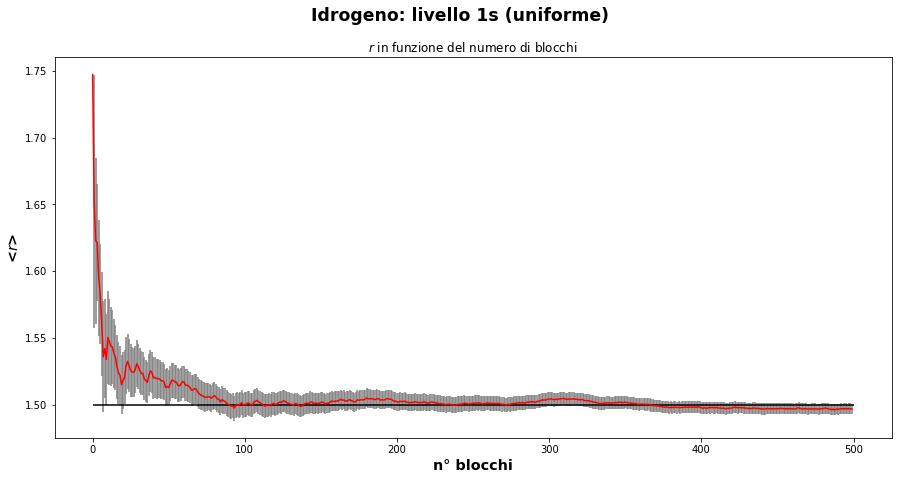

In [3]:
plt.figure(figsize=(15,7))
plt.errorbar(x=x,y=r,yerr=r_err, color="red", ecolor="grey")
plt.suptitle('Idrogeno: livello 1s (uniforme)' ,size='xx-large', weight='bold')
plt.title("$r$ in funzione del numero di blocchi")
plt.xlabel("n° blocchi",size='x-large', weight='bold')
plt.ylabel("<$r$>",size='x-large', weight='bold')
plt.hlines(1.5,0,500)


In [4]:
r=np.loadtxt("hidrogen210uniform.dat")
r_err=np.loadtxt("hidrogen210uniform_err.dat")
x=range(0,r.size)

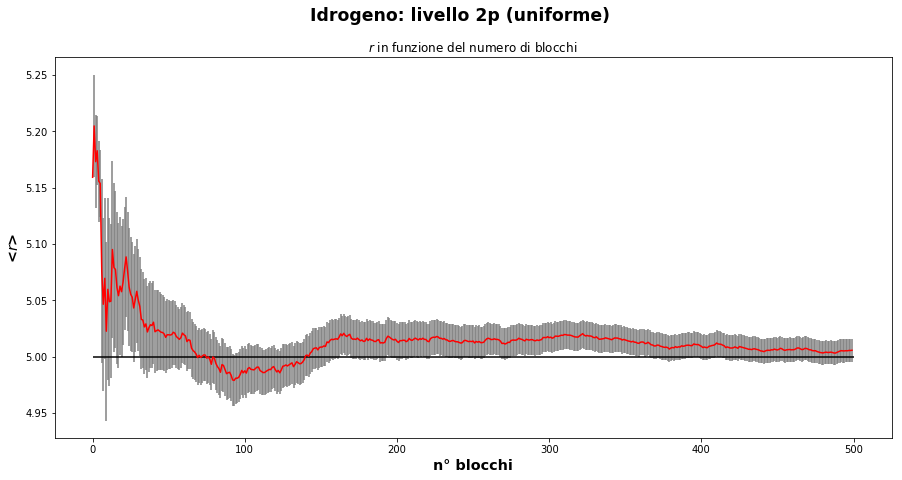

In [5]:
plt.figure(figsize=(15,7))
plt.errorbar(x=x,y=r,yerr=r_err, color="red", ecolor="grey")
plt.suptitle('Idrogeno: livello 2p (uniforme)' ,size='xx-large', weight='bold')
plt.title("$r$ in funzione del numero di blocchi")
plt.xlabel("n° blocchi",size='x-large', weight='bold')
plt.ylabel("<$r$>",size='x-large', weight='bold')
plt.hlines(5,0,500)


In [6]:
r=np.loadtxt("hidrogen100gaussian.dat")
r_err=np.loadtxt("hidrogen100gaussian_err.dat")
x=range(0,r.size)

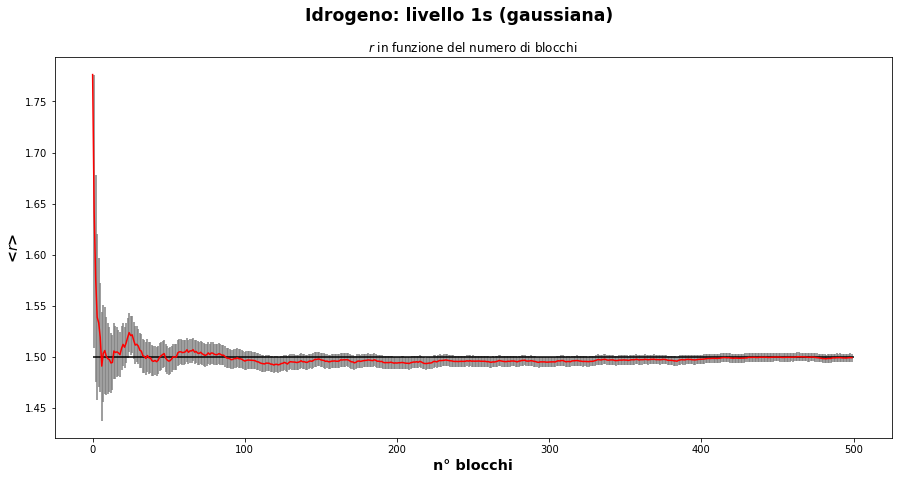

In [7]:
plt.figure(figsize=(15,7))
plt.errorbar(x=x,y=r,yerr=r_err, color="red", ecolor="grey")
plt.suptitle('Idrogeno: livello 1s (gaussiana)' ,size='xx-large', weight='bold')
plt.title("$r$ in funzione del numero di blocchi")
plt.xlabel("n° blocchi",size='x-large', weight='bold')
plt.ylabel("<$r$>",size='x-large', weight='bold')
plt.hlines(1.5,0,500)

In [8]:
r=np.loadtxt("hidrogen210gaussian.dat")
r_err=np.loadtxt("hidrogen210gaussian_err.dat")
x=range(0,r.size)

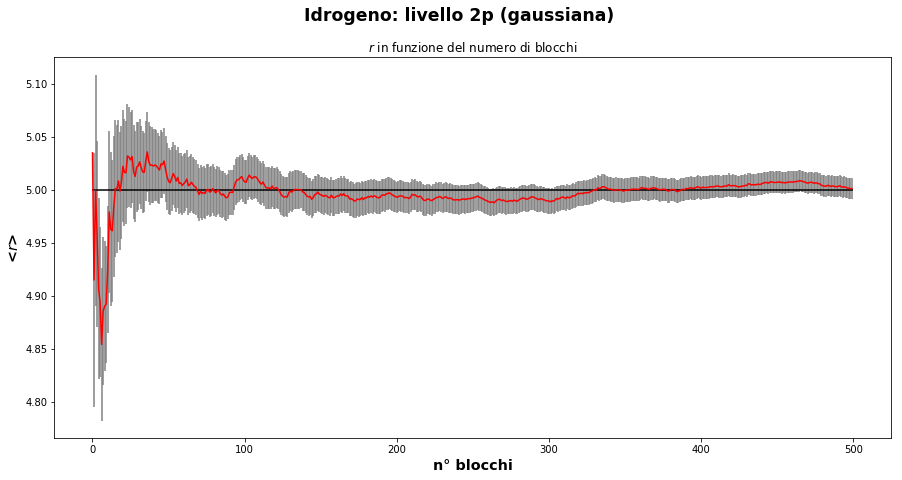

In [9]:
plt.figure(figsize=(15,7))
plt.errorbar(x=x,y=r,yerr=r_err, color="red", ecolor="grey")
plt.suptitle('Idrogeno: livello 2p (gaussiana)' ,size='xx-large', weight='bold')
plt.title("$r$ in funzione del numero di blocchi")
plt.xlabel("n° blocchi",size='x-large', weight='bold')
plt.ylabel("<$r$>",size='x-large', weight='bold')
plt.hlines(5,0,500)

#### Alcune considerazioni

Se il punto è troppo lontano l'algoritmo non converge. Ci aspettiamo infatti che partendo in un intorno del massimo della distribuzione di probabilità, dopo un certo numero di step ci finisca vicino. Ciò avviene molto più lentamente o può non avvenire affatto se il punto da cui parte l'algoritmo è molto lontano. La stima dei punti di partenza è stata effettuata semplicemente eseguendo l'algoritmo con valore di partenza l'origine per la funzione d'onda del ground state ( è sfericamente simmetrica). Per lo stato 2p avrebbe senso partire da un punto con $z \neq 0$ poichè la simmetria è cilindrica invece, ad esempio prendiamo il raggio di  Bohr ( quindi partiamo da (0,0,1)).

Si può notare invece la differenza sostanziale che occorre nell'uso di diverse distribuzioni di probabilità per l'algoritmo di Metropolis: dai grafici riportati si evince che con la gaussiana multivariata l'algoritmo converge decisamente in maniera più veloce.

Il numero di blocchi è stato portato a 500; questo poichè vogliamo che vi siano almeno 200 punti per ogni blocco. (Il numero di step da effettuare per l'esercizio è richiesto che sia maggiore uguale di $M=10^6$).

### Visualizzazione 3D

Di seguito la rappresentazione in tre dimensioni della distribuzione dei punti campionati nello spazio.

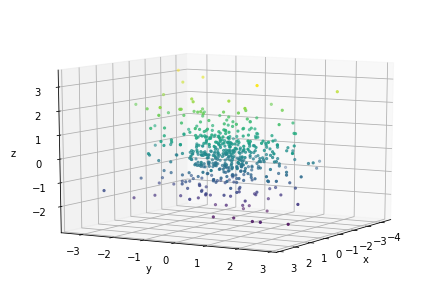

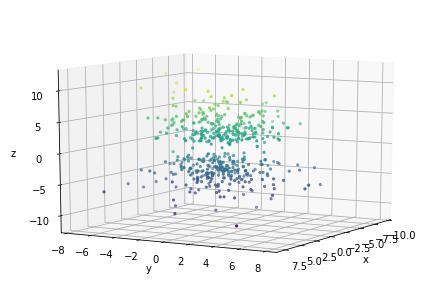

In [10]:
from mpl_toolkits.mplot3d import Axes3D

X,Y,Z= np.loadtxt("hidrogen_pos100gaussian.dat",unpack=True) 

fig = plt.figure()
#ax.title("Orbitale 1s, distribuzione uniforme", weight="bold", size="xx-large")
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()


X,Y,Z= np.loadtxt("hidrogen_pos210gaussian.dat  ",unpack=True) 

fig = plt.figure()

ax = Axes3D(fig)
#ax.title("Orbitale 2p, distribuzione gaussiana", weight="bold", size="xx-large")
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()